# **SKlearn**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1°) Linear regression avec sklearn

In [2]:
np.random.seed(0)

# creating 100 examples
m = 100 

# feattures
X = np.linspace(0, 10, m).reshape(m, 1)

# target 
y = X + np.random.randn(m, 1)

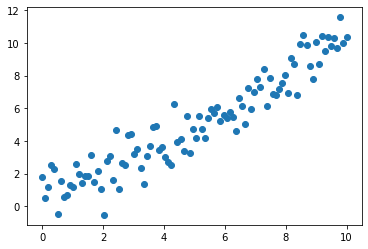

In [3]:
plt.scatter(X, y)

## import modules LinearRegression

In [4]:
from sklearn.linear_model import LinearRegression

### I) **create model**

In [5]:
model = LinearRegression()

### II) **Train model**

In [6]:
model.fit(X,y)

LinearRegression()

### III) **Evaluate model**

In [7]:
model.score(X, y)

0.8881140743377214

### IV) **Predict**

In [8]:
predictions = model.predict(X)

### ---------------------------------

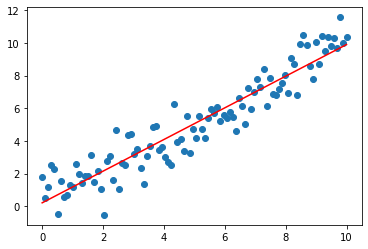

In [11]:
plt.scatter(X, y)
plt.plot(X, predictions, c='r')

# 2°) SVR

In [12]:
from sklearn.svm import SVR

In [16]:
np.random.seed(0)

# creating 100 examples
m = 100 

# feattures
X = np.linspace(0, 10, m).reshape(m, 1)

# target 
y = X**2 + np.random.randn(m, 1)
y = np.ravel(y)

In [17]:
model1 = SVR(C=100)

In [19]:
model1.fit(X,y)

SVR(C=100)

In [20]:
model1.score(X,y)

0.9989763625652847

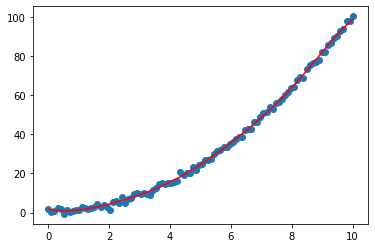

In [21]:
plt.scatter(X, y)
plt.plot(X, model1.predict(X), c='r')

# ***Classification***

In [22]:
import pandas as pd 

In [23]:
titanic = pd.read_excel('titanic3.xls')

In [24]:
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


## filter

In [25]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]

In [26]:
titanic.dropna(axis=0, inplace=True)

## replace strings by values

In [27]:
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)

In [28]:
titanic.head()

,survived,pclass,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,0,1,1,2.0000
3,0,1,0,30.0000
4,0,1,1,25.0000


## import model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

### Initialize model 

In [30]:
model = KNeighborsClassifier()

#### prepare data

In [31]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

### Train model

In [32]:
model.fit(X, y)

KNeighborsClassifier()

In [33]:
model.score(X,y)

0.8279158699808795

## function

In [34]:
def survivre(model, pclass=1, sex=0, age=5):
    x = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [35]:
survivre(model)


[1]
[[0. 1.]]


# **Exercice**

In [36]:
bestScore = []

for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X,y)
    score = model.score(X,y)
    bestScore.append(score)
    if score == np.max(bestScore):
        j=i


In [37]:
model = KNeighborsClassifier(n_neighbors=j)
model.fit(X, y)
model.score(X,y)
model.predict(X)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)